# Advertising decisions

## Introduction
We work for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

## Goal
Our goal in this project is to find out the two best markets to advertise our product in.

## Method
To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in the GitHub repository, here: https://github.com/freeCodeCamp/2017-new-coder-survey.

### Why you're using a ready-made data set instead of organizing a survey.
The costs and time involved in running a new survey, would be significant.  We shall first of all explore this dataset to see whether it is possible to use it for our needs.

### What's this data set about.



### Where can this data set be downloaded.

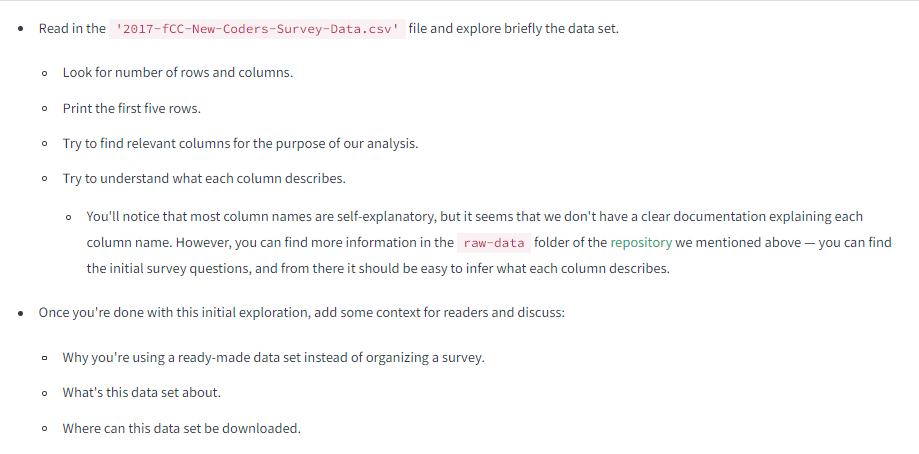

In [1]:
# setting up the work environment with the most likely required libraries
import pandas as pd
from numpy import std, var
from numpy import arange
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
dataset = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
dataset.info()
pd.options.display.max_columns = 150 # to avoid truncated output 
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


C:\Users\annsc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We can see from the information and sample view above, the survey dataset has 18175 rows and 136 columns - probably one column per question in the original survey.  Many of these columns will not be required for our analysis. So we will now try to work out which data we will require for this analysis.

Let's get a full list of all of the column names to determine which ones may be of interest for us.

In [3]:
# iterating the columns
for col in dataset.columns:
    print(col)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

From the list of column headings above, the following columns may be of interest:

- Where? Columns of possible interest: 'CountryLive' and 'CountryCitizen'
- Locations? The columns indicated above would probably be of greatest relevance
- How much? The dataset has a column titled 'MoneyForLearning', which should be useful

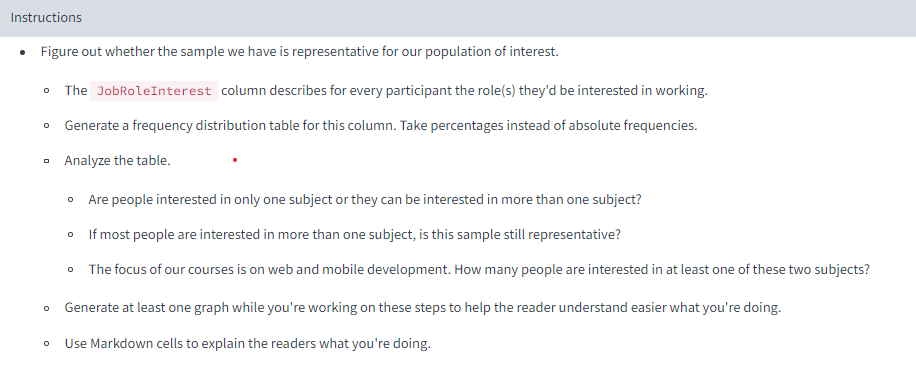


### Is the sample representative of the population of interest?
Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.  To ascertain this, we shall try to determine what jobs new coders, who responded to the survey, are most interested in.
Let's take a look at the 'JobRoleInterest' column to see if people are interested in the sort of web and mobile development
courses we offer.

In [4]:
# High level view of the 'JobRoleInterest' column.
dataset['JobRoleInterest'].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

In [5]:
# First of all let's remove those rows where a 'JobRoleInterest' preference is not expressed.
non_nulls = dataset['JobRoleInterest'].dropna()

In [6]:
# Listing the different entries for the 'JobRoleInterest' column.
((non_nulls.value_counts(normalize = True))*100).head(40)

Full-Stack Web Developer                                                           11.770595
  Front-End Web Developer                                                           6.435927
  Data Scientist                                                                    2.173913
Back-End Web Developer                                                              2.030892
  Mobile Developer                                                                  1.673341
Game Developer                                                                      1.630435
Information Security                                                                1.315789
Full-Stack Web Developer,   Front-End Web Developer                                 0.915332
  Front-End Web Developer, Full-Stack Web Developer                                 0.800915
  Product Manager                                                                   0.786613
Data Engineer                                                         

There are 18175 total entries in the survey dataset.
6992 of these have entries in the 'JobRoleInterest' column, with 'Full-Stack Web Developer' being the most frequent entry, at 11.77% of all single responses.

Many people have not yet concentrated their minds on one job role, instead keeping their options open and, in some cases, expressing multiple preferences at this stage.

With our courses mainly focussed web or mobile development, we are mainly interested in understanding these people, so how many of them have responded to this survey?

### How many new coders include 'web' and/or 'mobile' in their job interests list?


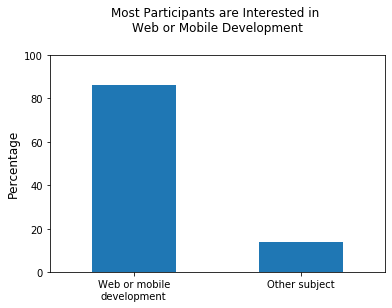

True     86.312929
False    13.687071
Name: JobRoleInterest, dtype: float64


In [7]:
# How many include 'web' or 'mobile'?
web_or_mobile = non_nulls.str.contains("web|mobile", na = False, case = False)

freq_table = web_or_mobile.value_counts(normalize = True) * 100

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

print(freq_table)

We can see from the graph that the vast majority of people who responded to the survey, and who actually stated a job preference, are interested in either web and/or mobile development, so this dataset is suitable for our purposes.

Before progressing the analysis any further, we shall remove those rows where a JobRoleInterest is not expressed, as we are not able to determine whether or not they are open to our courses.  This will become our 'sample' dataset.

In [8]:
sample = dataset[dataset['JobRoleInterest'].notnull()].copy()
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 7.3+ MB


## Starting the analysis
Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participant lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

### Analysis

- Generate a frequency table for the CountryLive variable.
- Generate both absolute and relative frequencies.
- Analyze the results.

Based on the results, what are the two markets you'd choose for advertisement?

Can we stop the analysis here, or we need to go more in depth?

In [9]:
absolute_frequencies = sample['CountryLive'].value_counts()
percentage = sample['CountryLive'].value_counts(normalize = True)*100
pd.options.display.max_rows = len(absolute_frequencies) # avoids truncated output 
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 'Percentage': percentage})


,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


## Initial findings
From the results above, it would appear that advertising should be conducted in the USA and India.  However, this analysis does not take into account the populations of those countries and the relative effort that would be needed to find the small percentage of people that want to code in these countries and it also does not take into account how willing these coders are to sepnd money on their learning.

## Further analysis
Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

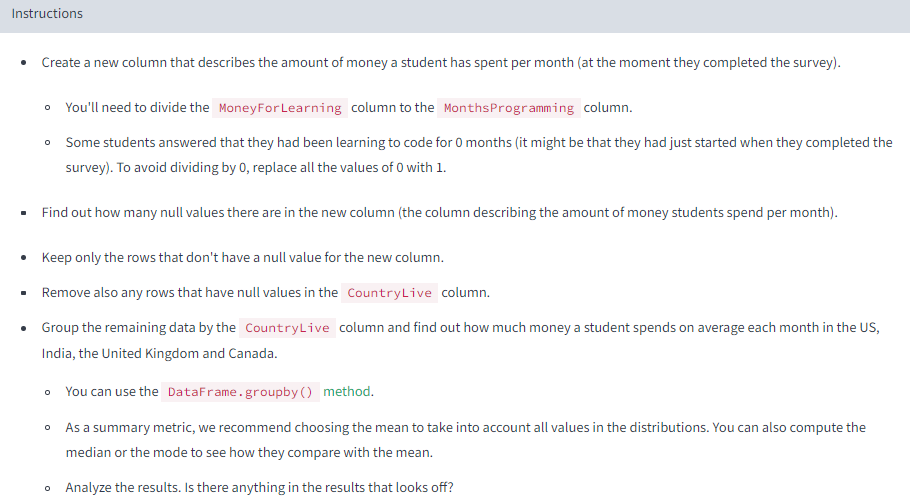

In [32]:
sample['MonthsProgramming'].replace(0,1, inplace = True) # replace any zero 'MonthsProgramming' with 1
sample['monthly_spend'] = sample['MoneyForLearning']/sample['MonthsProgramming'] # calculate the new column 'monthly_spend'
print('There are', sample['monthly_spend'].isnull().sum(), ' null entries in the "monthly_spend" column') # how many nulls are there in the 'monthly_spend' column

There are 675  null entries in the "monthly_spend" column


In [34]:
# so we shall remove these null entries
new_sample = sample[sample['monthly_spend'].notnull()]

# now let's make sure the null values have been removed
print('There are now',
      new_sample['monthly_spend'].isnull().sum(),
      ' null entries in the "monthly_spend" column')

There are now 0  null entries in the "monthly_spend" column


In [35]:
# Let's have a quick look at the values in the monthly_spend column
new_sample['monthly_spend'].describe()

count     6317.000000
mean       177.468653
std       1563.115242
min          0.000000
25%          0.000000
50%          0.708333
75%         33.333333
max      80000.000000
Name: monthly_spend, dtype: float64

The maximum spend quoted in the 'monthly_spend' column is $80,000, which does not appear to be a reasonable spend.
Let's take a closer look at the max values appearing in this column.

In [44]:
new_sample['monthly_spend'].value_counts().sort_index(ascending = False).head(20)

80000.000000    1
50000.000000    1
40000.000000    1
30000.000000    1
20000.000000    2
16666.666667    1
15000.000000    2
14000.000000    1
12500.000000    1
12000.000000    1
10833.333333    1
10000.000000    3
9000.000000     2
8666.666667     1
8000.000000     2
7500.000000     1
6666.666667     2
6500.000000     1
5666.666667     1
5333.333333     1
Name: monthly_spend, dtype: int64

Spending 10's of thousands of dollars on learning each month sounds a lot, which could call the accuracy of the base data into question.
Before we discount this analysis, let's see what this looks like across the top four countries from our earlier analysis: USA, India, UK and Canada.  

Before we start working with the 'CountryLive' column, we will need to remove any 'null' values in this column.

In [58]:
# remove any rows with null values in the CountryLive' column 
countries = new_sample[new_sample['CountryLive'].notnull()]

# check if there is sufficient data for each country we are intrested in
countries['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

It looks like we have sufficient responses from each country to enable to analyse the monthly_spend for each one.

We will first of all look at the issue of any outliers that exist within the country spend data by looking at the spread of the monthly_spend values for these countries and identifying what outlier limits we should set. 

In [64]:
# Isolate only the countries of interest
top_four = countries[countries['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
# look at the monthly_spend values for these countries
top_four['monthly_spend'].describe()


count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: monthly_spend, dtype: float64

In [83]:
# Lets look at the mean values for the four countries
mean_top_four = top_four.groupby('CountryLive').mean()
mean_top_four['monthly_spend'].sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: monthly_spend, dtype: float64

With a mean value (196 Dollars per month) that is 5x higher than 75% of responses (40 Dollars per month) and a standard deviation on this mean of 1701 Dollars demonstrates how widely dispersed these values are.

Let's try to explore this visually.

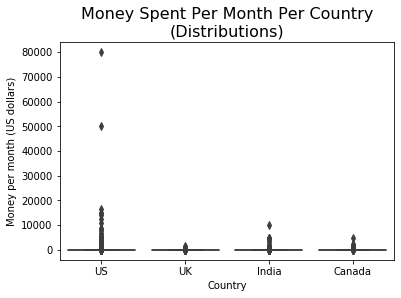

In [66]:
sns.boxplot(y = 'monthly_spend', x = 'CountryLive',
            data = top_four)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

From the Box Plot a above it is very evident there are some outliers, most notably in the US results, that may be impacting on our subsequent calculations.  In order to reduce this potential impact, we shall remove any rows with monthly_spend values greater than 4,000 US dollars - which is still very high, but is possibly reasonable if spent on bootcamps.

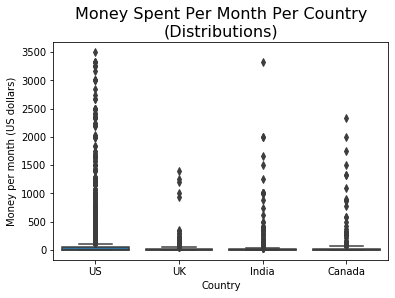

In [90]:
# remove the outliers above 10000
t4_corrected = top_four[top_four['monthly_spend']<4000]

# re-look at the graph above with the high outliers removed
sns.boxplot(y = 'monthly_spend', x = 'CountryLive',
            data = t4_corrected)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are still many potential outliers, especially with the USA and India data, but let's see how the four countries currently compare in their monthly spends.

In [91]:
t4_mean = t4_corrected.groupby('CountryLive').mean()

In [92]:
start = "\033[1m" # start Bold formatting
end = "\033[0;0m" # ends Bold formatting 
print(start + 'Mean country spend per month - before outlier correction' + end, '\n\n', mean_top_four['monthly_spend'].sort_values(ascending = False))
print('\n',start + 'Mean country spend per month - after outlier correction' + end, '\n\n', t4_mean['monthly_spend'].sort_values(ascending = False))

Mean country spend per month - before outlier correction 

 CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: monthly_spend, dtype: float64

 Mean country spend per month - after outlier correction 

 CountryLive
United States of America    119.306296
Canada                       93.065400
India                        72.893205
United Kingdom               45.534443
Name: monthly_spend, dtype: float64


## Results
From the tables above we see that some of the variation between each country's average spend has been eliminated.
The USA remains the logocal first choice for investment.  However, a case for the second country for investment is more complex.

With the monthly subscription the company chargers being 59 dollars, it would appear from this analysis that investment in the Uk would not achieve positive results - where the average monthly spend is less than this figure.

Although Canada appears to have more spend, the pool of coders within India is much greater, with India having 2x the number of responses as from Canada.

## Conclusions
We could propose a number of options based on this analysis:
1. Put all of the investment into the USA, where the average spend and the number of coders is far greater than other countries.
2. Invest in USA and both India and Canada - at a possible ratio of 50%, 25%, 25%
3. The company could do further survey work in Canada and India to ascertain which of the two more significant investment should go into.